In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

df = pd.read_csv('Lab 5/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


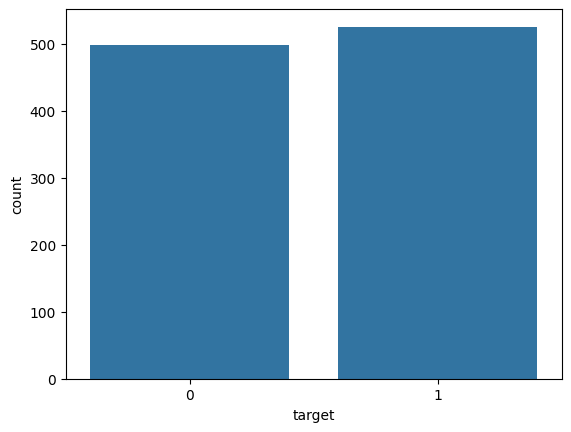

In [16]:
df.info()
df.describe()
df.shape

sns.countplot(x='target', data=df)
plt.show()

In [17]:
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

target
1    526
0    499
Name: count, dtype: int64
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [18]:
# checking for hte duplicates
print("missing:  \n", df.isnull().sum())
print("\n\nduplicates:  ", df.duplicated().sum())

missing:  
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


duplicates:   723


In [19]:
# removing duplicates
df = df.drop_duplicates()
df.nunique() # columns


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

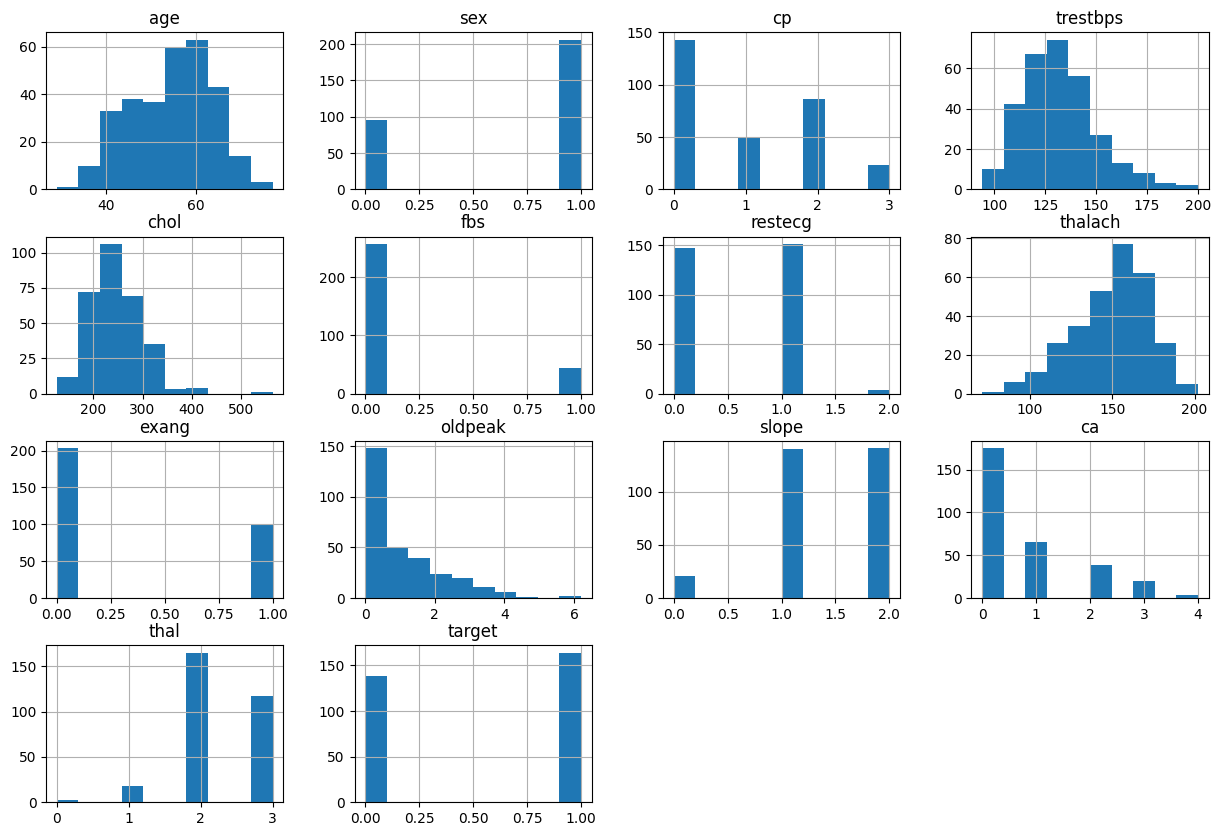

In [ ]:
# checking either feature scaling is required or not
df.hist(figsize=(15,10))
plt.show()

In [22]:
# feature scaling
X = df.drop('target', axis=1)
y= df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print("we use validation set to tune hyperparameters and detect overfitting without touching the test set")

we use validation set to tune hyperparameters and detect overfitting without touching the test set


In [30]:
# applying models

# random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_main, y_train_main)
rf_train_acc = accuracy_score(y_train_main, rf.predict(X_train_main))
rf_test_Acc = accuracy_score(y_test, rf.predict(X_test))

# xgboost
xgb = XGBClassifier(random_state=0, eval_metric='logloss')
xgb.fit(X_train_main, y_train_main)
xgb_train_acc = accuracy_score(y_train_main, xgb.predict(X_train_main))
xgb_test_acc = accuracy_score(y_test, xgb.predict(X_test))

# adaboost
ada = AdaBoostClassifier(random_state=0, algorithm='SAMME')
ada.fit(X_train_main, y_train_main)
ada_train_acc = accuracy_score(y_train_main, ada.predict(X_train_main))
ada_test_acc = accuracy_score(y_test, ada.predict(X_test))


# comparing restults
results = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'XGBClassifier', 'AdaBoostClassifier'],
    'Train Accuracy': [rf_train_acc, xgb_train_acc, ada_train_acc],
    'Test Accuracy': [rf_test_Acc, xgb_test_acc, ada_test_acc]
})
print(results)


                    Model  Train Accuracy  Test Accuracy
0  RandomForestClassifier        1.000000       0.803279
1           XGBClassifier        1.000000       0.786885
2      AdaBoostClassifier        0.910714       0.754098
